# PanelA

A notebook to generate the graph in **Figure 6, Panel A**.

In [1]:
library(ggplot2)

In [2]:
library(repr)

In [3]:
options(repr.plot.width=6, repr.plot.height=2)

In [4]:
# blank out extraneous things
opts <- theme(axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      legend.position="none",
      panel.background=element_blank(),
      panel.border=element_blank(),
      panel.grid.major=element_blank(),
      panel.grid.minor=element_blank(),
      plot.background=element_blank())

In [5]:
# define some color-blindness-friendly colors

safered <- "#920000"
safegreen <- "#009292"
safeviolet <- "#490092"

In [6]:
# define a function to make curves
curve <- function(offset_x = 0, offset_y = 0, width = 1, scale_y = 1){
    return (data.frame(x=(offset_x + -125:125)/100, y =offset_y + dnorm((-125:125)/100, sd = width)*scale_y))
}

Warning message:
“Removed 250 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_errorbarh).”

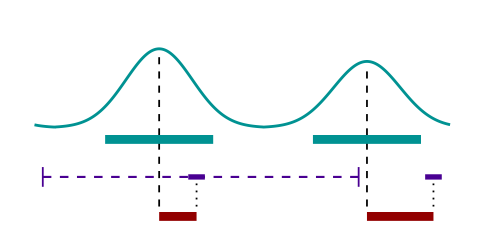

In [7]:
options(repr.plot.width=4, repr.plot.height=2)

panelA_2_data <- rbind(curve(offset_y=.35, width = .4, scale_y=.4),
                       curve(offset_x=250, offset_y=.35, width=.4, scale_y=.336),
                       curve(offset_x=-250, offset_y=.35, width=.4, scale_y=.32)   )

subdata <- panelA_2_data[panelA_2_data$x < 2.7 & panelA_2_data$x > -1.8,]

ggplot()+geom_line(data=panelA_2_data, aes(x=x, y=y), color=safegreen, size=.8) +
        ylim(-.1,.9) +
        xlim(-1.5,3.5) +
        theme_classic() + 

        theme(axis.title.x=element_text(size=rel(0.9))) +
        theme(axis.title.y=element_text(size=rel(0.9))) +
        theme(title=element_text(size=rel(0.8))) +

        # draw the distances
        annotate("linerange", x = .45, ymin = -.05, ymax = 0.1, colour = "black", linetype='dotted') +
        annotate("linerange", x = 0, ymin = -.05, ymax = 0.7986779-.06, colour = "black", linetype='dashed') + 
        annotate("errorbarh", x = 0, y = -.10, xmin = .0, xmax = .45, colour = safered, size = 2.5) + 

        annotate("linerange", x = 3.3, ymin = -.05, ymax = 0.1, colour = "black", linetype='dotted') +
        annotate("linerange", x = 2.5, ymin = -.05, ymax = 0.7986779-.13, colour = "black", linetype='dashed') + 
        annotate("errorbarh", x = 0, y = -.10, xmin = 3.3, xmax = 2.5, colour = safered, size = 2.5) + 

        # motif bars
        annotate("errorbarh", x = 0, y = .1 , xmin = .35, xmax = .55, colour = safeviolet, size = 1.5) + 
        annotate("errorbarh", x = 0, y = .1 , xmin = 3.2, xmax = 3.4, colour = safeviolet, size = 1.5) + 
        
        # nucleosome bars
        annotate("errorbarh", x = 0, y = .29, xmin =  -.65, xmax =   .65, colour = safegreen, size = 2.5) +
        annotate("errorbarh", x = 0, y = .29, xmin = -3.15, xmax = -1.85, colour = safegreen, size = 2.5) + 
        annotate("errorbarh", x = 0, y = .29, xmin =  3.15, xmax =  1.85, colour = safegreen, size = 2.5) +

        # draw the dashed purple bar
        annotate("errorbarh", x = 0, y = .1 , xmin = -1.4, xmax = 2.4, colour = safeviolet, size = .6, linetype='dashed') + 
        annotate("linerange", x =  2.4, ymin = .05, ymax = 0.15, colour = safeviolet) +
        annotate("linerange", x = -1.4, ymin = .05, ymax = 0.15, colour = safeviolet) +

        # blank out everything else
        opts